# 5.CANADIAN PIZZA PRIZE PREDICTION
####Sample link: https://www.kaggle.com/code/kwangjongchoi/pizza-price-prediction

###Importing...

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###a. Count the number of null values in the pizza dataset and replace null values with average of the concerned columns.

In [ ]:
pizza = pd.read_csv('/content/drive/MyDrive/STUDY2/DATA ANALYSIS LAB/LABCYCLE/DATASETS/pizza_price_prediction_5thquestion.csv',dtype=str)
pizza

,company,price_cad,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,$29,22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,$25,20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,$19,16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,$22,14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,$30,18 inch,mozzarella,double_signature,jumbo,yes,no,yes
...,...,...,...,...,...,...,...,...,...
124,E,$11,8.5 inch,tuna,spicy tuna,small,yes,yes,yes
125,E,$14,12 inch,tuna,spicy tuna,medium,yes,yes,yes
126,E,$17,14 inch,tuna,spicy tuna,large,yes,yes,yes
127,E,$12,8.5 inch,meat,BBQ_meat_fiesta,small,yes,no,yes


In [ ]:
'''
pizza['price_cad'].iloc[2]=np.nan
pizza['price_cad'].iloc[3]=np.nan
pizza['diameter'].iloc[2]=np.nan
pizza.head()'''

"\npizza['price_cad'].iloc[2]=np.nan\npizza['price_cad'].iloc[3]=np.nan\npizza['diameter'].iloc[2]=np.nan\npizza.head()"

In [ ]:
num_cols = ['price_cad', 'diameter']
pizza['price_cad'] = pizza['price_cad'].str.replace('$', '')
pizza['diameter'] = pizza['diameter'].str.replace(' inch','')
pizza['price_cad'] = pd.to_numeric(pizza['price_cad'], errors='coerce')
pizza['diameter'] = pd.to_numeric(pizza['diameter'], errors='coerce')
print('The number of Null values in the dataset are: ',pizza.isnull().sum())
for num in num_cols:
    pizza[num].fillna(pizza[num].mean(),inplace=True)
    pizza[num] = pizza[num].astype(int)
pizza.head()

The number of Null values in the dataset are:  company            0
price_cad          0
diameter           0
topping            0
variant            0
size               0
extra_sauce        0
extra_cheese       0
extra_mushrooms    0
dtype: int64


<ipython-input-5-78477043aa63>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  pizza['price_cad'] = pizza['price_cad'].str.replace('$', '')


,company,price_cad,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,29,22,chicken,double_signature,jumbo,yes,yes,no
1,A,25,20,papperoni,double_signature,jumbo,yes,yes,no
2,A,19,16,mushrooms,double_signature,reguler,yes,yes,yes
3,A,22,14,smoked_beef,double_signature,reguler,yes,no,yes
4,A,30,18,mozzarella,double_signature,jumbo,yes,no,yes


###b. Calculate average price of pizza prepared by each company.

In [ ]:
average_price_by_company = pizza.groupby('company')['price_cad'].mean()
print(average_price_by_company)

company
A    19.600
B    14.375
C    13.800
D    16.600
E    14.400
Name: price_cad, dtype: float64


###c. Find the companies, who prepared pizzas with different variants with same diameter.

In [ ]:
#companies_with_different_variants = pizza[pizza.duplicated(subset=['diameter'], keep=False)]['company'].unique()
# Group by 'diameter' and 'company' columns, then count the number of unique 'variant' values
variant_counts = pizza.groupby(['diameter', 'company'])['variant'].nunique()

# Filter for companies with more than one unique variant for the same diameter
companies_with_different_variants = variant_counts[variant_counts > 1].index.get_level_values('company').unique()

print(companies_with_different_variants)
print("\n\n VARIANT Counts:\n",variant_counts)

Index(['A', 'C', 'D', 'E', 'B'], dtype='object', name='company')


 VARIANT Counts:
 diameter  company
8         A           3
          B           1
          C          10
          D           2
          E           3
12        A           3
          B           3
          C          10
          D           4
          E           5
14        A           2
          B           1
          C          10
          D           2
          E           2
16        A           5
          D           2
17        B           1
          D           1
          E           1
18        A           5
          D           2
20        A           1
22        A           2
          D           1
Name: variant, dtype: int64


###d. Which company has more pizzas? Show the result with graph.

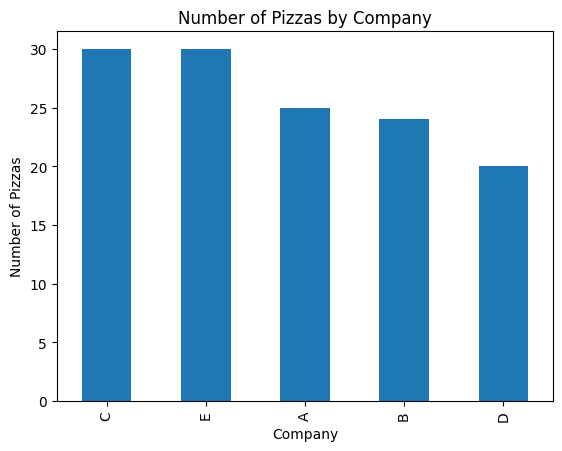

In [ ]:
import matplotlib.pyplot as plt

company_pizza_counts = pizza['company'].value_counts()

company_pizza_counts.plot(kind='bar')
plt.xlabel('Company')
plt.ylabel('Number of Pizzas')
plt.title('Number of Pizzas by Company')
plt.show()

###e. Check whether the pizza data set contains null value or not.
###Count the no. of null values in the pizza dataset./ Find the number of missing data points per column.

In [ ]:
print(pizza.isnull().values.any())
print("\n",pizza.isnull().sum())

False

 company            0
price_cad          0
diameter           0
topping            0
variant            0
size               0
extra_sauce        0
extra_cheese       0
extra_mushrooms    0
dtype: int64


###f. Rename the column price_cad as price.

In [ ]:
pizza.rename(columns={'price_cad': 'price'}, inplace=True)
pizza.head(2)

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,29,22,chicken,double_signature,jumbo,yes,yes,no
1,A,25,20,papperoni,double_signature,jumbo,yes,yes,no


###g. Identify the number of companies in each category

In [ ]:
company_count_by_topping = pizza.groupby('topping')['company'].nunique()
print(company_count_by_topping)

topping
beef            1
black_papper    1
chicken         4
meat            2
mozzarella      5
mushrooms       5
onion           1
papperoni       1
sausage         1
smoked_beef     4
tuna            2
vegetables      1
Name: company, dtype: int64


###h. Identify which type of pizza is more expensive.

In [ ]:
#pizza
total_price = pizza.groupby(['topping', 'variant', 'size'])['price'].sum()
print(total_price,'\n')
expensive_pizza = total_price.idxmax()
print("The most expensive type of pizza is:", expensive_pizza)

topping       variant            size  
beef          american_classic   large     17
                                 medium    13
                                 small     11
black_papper  american_favorite  jumbo     20
              super_supreme      jumbo     18
                                           ..
vegetables    italian_veggie     medium    12
                                 small     10
              thai_veggie        large     17
                                 medium    14
                                 small     11
Name: price, Length: 78, dtype: int64 

The most expensive type of pizza is: ('chicken', 'classic', 'medium')


###i. Find diameter of jumbo size pizza.

In [ ]:
jumbo_size = pizza[pizza['size'] == 'jumbo']['diameter'].mean()
print("The size of Jumbo size pizza is: ",jumbo_size)

The size of Jumbo size pizza is:  18.4


###j. Any jumbo pizza with diameter less than 16 exists, remove such rows.

In [ ]:
pizza2 = pizza[~((pizza['size'] == 'jumbo') & (pizza['diameter'] < 16))]
pizza2[(pizza['size']=='jumbo')]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,29,22,chicken,double_signature,jumbo,yes,yes,no
1,A,25,20,papperoni,double_signature,jumbo,yes,yes,no
4,A,30,18,mozzarella,double_signature,jumbo,yes,no,yes
5,A,20,18,black_papper,american_favorite,jumbo,no,no,yes
6,A,18,16,smoked_beef,american_favorite,jumbo,no,yes,yes
10,A,20,18,mozzarella,super_supreme,jumbo,no,no,no
11,A,18,16,black_papper,super_supreme,jumbo,yes,yes,no
15,A,20,18,mozzarella,meat_lovers,jumbo,no,yes,yes
16,A,18,16,smoked_beef,meat_lovers,jumbo,no,yes,yes
20,A,28,22,chicken,double_mix,jumbo,yes,yes,yes


###k. Calculate average price of a pizza prepared by company A.

In [ ]:
avg_prize_by_a = pizza2[(pizza2['company']=='A')]['price'].mean()
print("The average price of a pizza prepared by company A is: ",avg_prize_by_a)

The average price of a pizza prepared by company A is:  19.6


###l. Find the mean of the diameter and average price of pizzas prepared by company C.

In [ ]:
avg_prize_by_c = pizza2[(pizza2['company']=='C')]['price'].mean()
mean_of_diameter = pizza2[(pizza2['company']=='C')]['diameter'].mean()
print('The mean of diameter of pizzas preperaed by the company C is: ', round(mean_of_diameter,3),'\n')
print('The average prize of pizzas preperaed by the company C is: ', avg_prize_by_c)

The mean of diameter of pizzas preperaed by the company C is:  11.333 

The average prize of pizzas preperaed by the company C is:  13.8


###m. Find the pizza variant with extra_mushrooms and topping with chicken.

In [ ]:
extra_topping_chicken = pizza2[(pizza2['extra_mushrooms'] == 'yes') & (pizza2['topping'] == 'chicken')]['variant'].unique()
print('The pizza variant with extra_mushrooms and topping with chickenis: ',extra_topping_chicken)

The pizza variant with extra_mushrooms and topping with chickenis:  ['meat_lovers' 'double_mix' 'new_york' 'double_decker' 'classic' 'crunchy']


###n. What is the most expensive pizza in each company?

In [ ]:
#pizza2.groupby('company')['price'].idxmax()
'''
company
A      4
B     36
C     51
D     84
E    111
Name: price, dtype: int64
'''

In [ ]:
pizza2

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,29,22,chicken,double_signature,jumbo,yes,yes,no
1,A,25,20,papperoni,double_signature,jumbo,yes,yes,no
2,A,19,16,mushrooms,double_signature,reguler,yes,yes,yes
3,A,22,14,smoked_beef,double_signature,reguler,yes,no,yes
4,A,30,18,mozzarella,double_signature,jumbo,yes,no,yes
...,...,...,...,...,...,...,...,...,...
124,E,11,8,tuna,spicy tuna,small,yes,yes,yes
125,E,14,12,tuna,spicy tuna,medium,yes,yes,yes
126,E,17,14,tuna,spicy tuna,large,yes,yes,yes
127,E,12,8,meat,BBQ_meat_fiesta,small,yes,no,yes


In [ ]:
expensive_pizza_com = pizza2.loc[pizza2.groupby('company')['price'].idxmax()]
expensive_pizza_com[['company','variant','price']]

,company,variant,price
4,A,double_signature,30
36,B,double_decker,19
51,C,spicy_tuna,17
84,D,double_mix,28
111,E,double_decker,19


###o. Which company has more pizzas on the menu? Show the result with graph
Note: it is same as question 'd.' may not necessary to write it

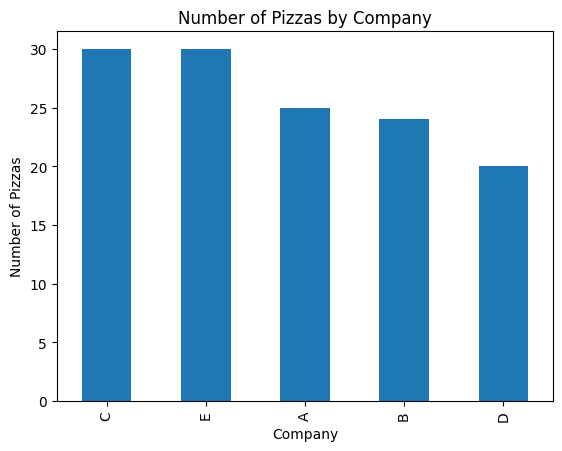

In [ ]:
import matplotlib.pyplot as plt

company_pizza_counts = pizza2['company'].value_counts()

company_pizza_counts.plot(kind='bar')
plt.xlabel('Company')
plt.ylabel('Number of Pizzas')
plt.title('Number of Pizzas by Company')
plt.show()

###p. What is the average price of pizza in each company?

In [ ]:
avg_price = pizza.groupby('company')['price'].mean()
print('The average price of pizza in each comapny is: \n',avg_price)

The average price of pizza in each comapny is: 
 company
A    19.600
B    14.375
C    13.800
D    16.600
E    14.400
Name: price, dtype: float64
